# Segmentation Contour Plot: Histopathology Example

This work was supported by NIH STTR R42 CA224888.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import monai
from segmentation_plot import segmplot


## Load example data

`segmentation-plot` assumes that image data is in the format CHW[D], where C is the channels and H,W,D is the height, width and (optional) depth, respectively.

In [2]:
ASSET_PATH = '../assets/histopath_example.npz'

loader = np.load(ASSET_PATH)
Image = loader['Image']
Segm = loader['Segm'].astype(int)
print("Loaded image, Image.shape:",Image.shape)
print("Loaded segmentation, Segm.shape:",Segm.shape)

Loaded image, Image.shape: (3, 512, 512, 1)
Loaded segmentation, Segm.shape: (1, 512, 512, 1)


## Process the images using MONAI

`segmentation-plot` requires the segmentaiton label image to be in one-hot encoding format. MONAI provides a convenient function for this.

In [3]:
# Get the max number of classes from the label image
num_classes = int(Segm.max())+1
# Conver the label image to one-hot encoding.
onehot = monai.transforms.AsDiscrete(to_onehot=num_classes)

Segm_onehot = onehot(Segm).numpy()
print("One-hot segmentation, Segm_onehot.shape:",Segm_onehot.shape)

One-hot segmentation, Segm_onehot.shape: (6, 512, 512, 1)


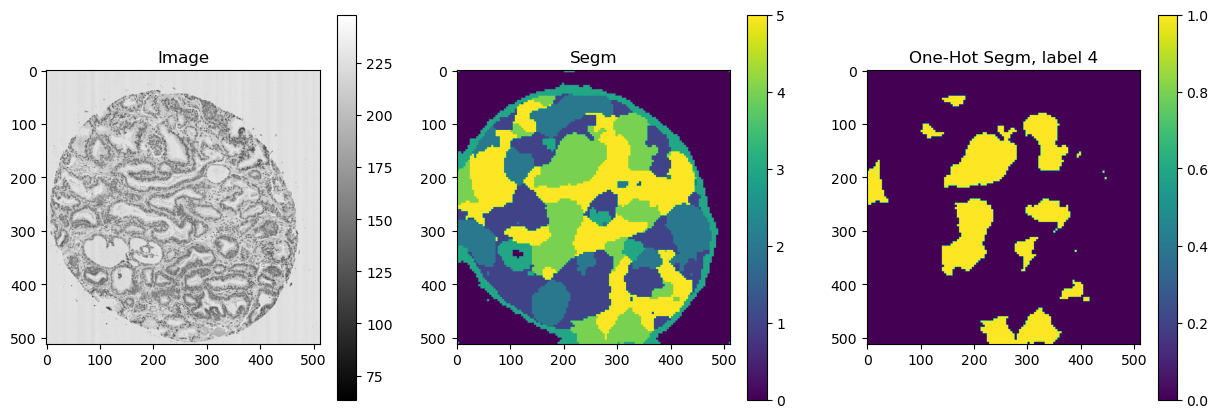

In [4]:
# Show the current data
plt.figure('example', (15, 5))
plt.subplot(1, 3, 1)
plt.title('Image')
plt.imshow(Image[0,...], cmap="gray")
plt.colorbar()
plt.subplot(1, 3, 2)
plt.title('Segm')
plt.imshow(Segm[0,...])
plt.colorbar()
plt.subplot(1, 3, 3)
plt.title('One-Hot Segm, label 4')
plt.imshow(Segm_onehot[4,...])
plt.colorbar()
plt.show()

## Usage

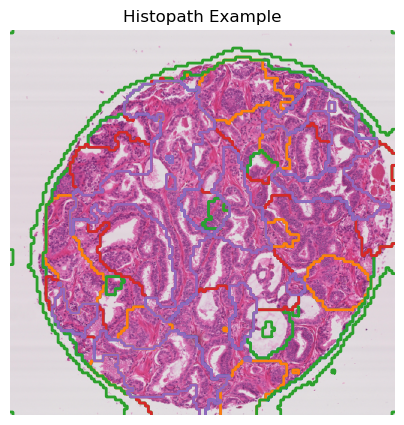

In [5]:
plt.figure('example', (5, 5))
segmplot.plot_segmentation(
    image=Image.astype(int).squeeze(), 
    segm=[Segm_onehot.squeeze()], 
    segm_cmap=[plt.colormaps['tab10']],
    linewidth=2.0, 
    alpha=1.0, 
    linestyle='-',
)
plt.title("Histopath Example")
plt.show()


## Advanced usage

The above Basic example looks okay, but because the segmentation countours overlap in many places, it can be hard to tell which label belong to which region of interest (ROI).

We can address this problem by enabling the smoothing functionality of `plot_segmentation`. This will plot the contours as non-overlapping elements. To enable this, provide a floating point value, e.g. 0.7, for the `smooth_sigma` parameter.

This processing involves first smoothing the one-hot label image and then thresholding this smoothed image to create a slightly smaller segmentation map, which effectively results in a contour offset.

Note, the smoothing value (sigma) is task specific. The appropriate threshold value (for the offset) depends on the choice of sigma.

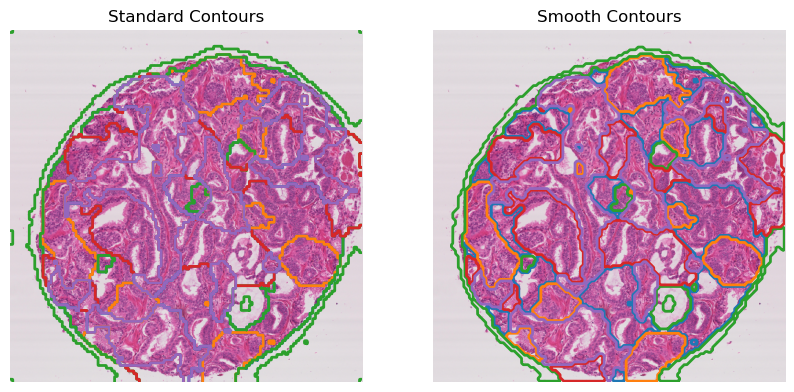

In [6]:
plt.figure('example', (10, 5))
plt.subplot(1, 2, 1)
segmplot.plot_segmentation(
    image=Image.astype(int).squeeze(), 
    segm=[Segm_onehot.squeeze()], 
    segm_cmap=[plt.cm.tab10],
    linewidth=2.0, 
    alpha=1.0, 
    linestyle='-',
)
plt.title('Standard Contours')
plt.subplot(1, 2, 2)
segmplot.plot_segmentation(
    image=Image.astype(int).squeeze(), 
    segm=[Segm_onehot.squeeze()], 
    segm_cmap=[plt.cm.tab10],
    smooth_sigma=2.0,
    threshold=0.7,
    linewidth=2.0, 
    alpha=1.0, 
    linestyle='-',
)
plt.title('Smooth Contours')
plt.show()

The final plot using smoothed, non-overlapping contours looks as follows. This plot can be saved as a PDF to preserve the vector graphics of the contours.

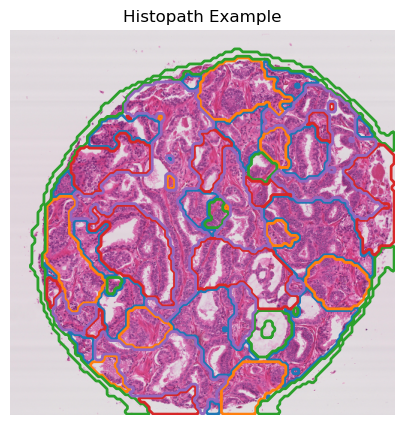

In [9]:

plt.figure('example', (5, 5))
segmplot.plot_segmentation(
    image=Image.astype(int).squeeze(), 
    segm=[Segm_onehot.squeeze()], 
    segm_cmap=[plt.colormaps['tab10']],
    smooth_sigma=2.0,
    threshold=0.7,
    linewidth=2.0, 
    alpha=1.0, 
    linestyle='-',
)
plt.title("Histopath Example")
plt.savefig('histopath_example.pdf', bbox_inches='tight')
plt.show()
